In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d\temp.csv"
data_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d\10\temp.csv"

In [3]:
df_2d = pd.read_csv(data_dir_2d, header = None, skiprows = 1)
df_3d = pd.read_csv(data_dir_3d, header = None, skiprows = 1)

# Rename columns (assuming 3 columns: X, Y, Temperature)
df_2d.columns = ['X', 'Y', 'Temperature']
df_3d.columns = ['X', 'Y', 'Temperature']

In [4]:
df_2d.shape, df_3d.shape

((961, 3), (441, 3))

In [5]:
df_2d.head()

,X,Y,Temperature
0,0.000000e+00,0.000,342.135
1,-6.940000e-19,0.005,342.084
2,-1.390000e-18,0.010,342.026
3,-2.080000e-18,0.015,341.969
4,-2.780000e-18,0.020,341.915


In [6]:
df_3d.head()

,X,Y,Temperature
0,0.095,5.000000e-03,320.950
1,0.095,-5.490000e-34,320.723
2,0.100,-5.780000e-34,320.630
3,0.100,5.000000e-03,320.752
4,0.100,1.000000e-02,321.018


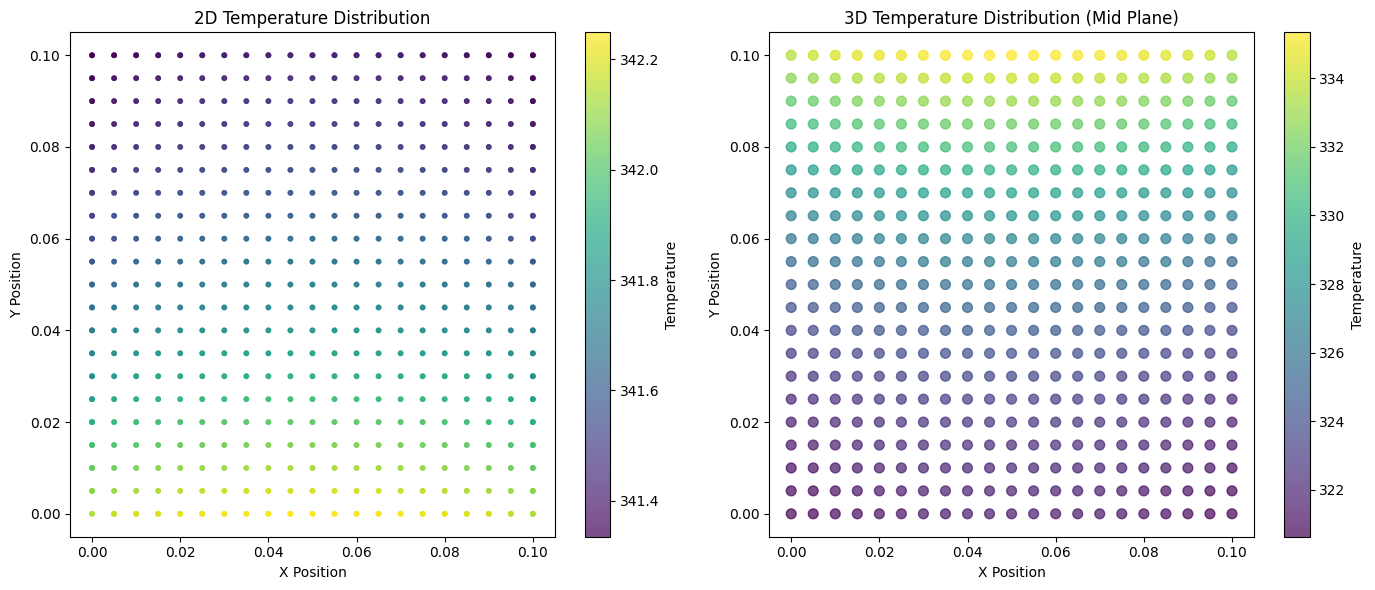

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sc1 = ax1.scatter(
    df_2d['X'],
    df_2d['Y'],
    c = df_2d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 10,
    vmin = df_2d['Temperature'].min(),
    vmax = df_2d['Temperature'].max()
)
ax1.set_title('2D Temperature Distribution')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')

cbar1 = plt.colorbar(sc1, ax = ax1)
cbar1.set_label('Temperature')

sc2 = ax2.scatter(
    df_3d['X'],
    df_3d['Y'],
    c = df_3d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 50,
    vmin = df_3d['Temperature'].min(),
    vmax = df_3d['Temperature'].max()
)
ax2.set_title('3D Temperature Distribution (Mid Plane)')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')

cbar2 = plt.colorbar(sc2, ax = ax2)
cbar2.set_label('Temperature')

plt.tight_layout()
plt.show()

In [8]:
def prepare_grid(df, round_decimals = 10):
    df['X'] = df['X'].round(round_decimals)
    df['Y'] = df['Y'].round(round_decimals)
    
    # Average temperature for duplicate (X, Y)
    df = df.groupby(['X', 'Y'], as_index = False).mean()

    x_unique = np.sort(df['X'].unique())
    y_unique = np.sort(df['Y'].unique())
    X, Y = np.meshgrid(x_unique, y_unique)

    pivot = df.pivot(index = 'Y', columns = 'X', values = 'Temperature')
    Z = pivot.values

    return X, Y, Z

In [9]:
# Prepare grids
X2d, Y2d, Z2d = prepare_grid(df_2d)
X3d, Y3d, Z3d = prepare_grid(df_3d)

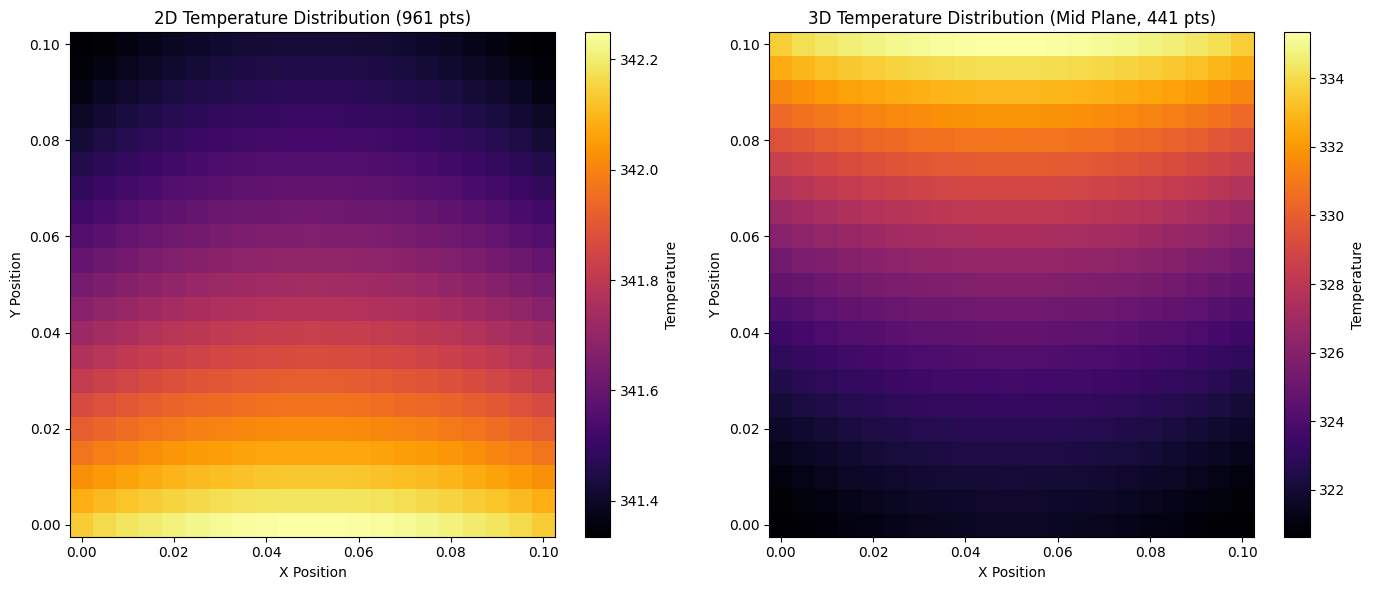

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

# 2D heatmap
c1 = ax1.pcolormesh(X2d, Y2d, Z2d, cmap = 'inferno', shading = 'auto')
ax1.set_title('2D Temperature Distribution (961 pts)')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
fig.colorbar(c1, ax = ax1, label = 'Temperature')

# 3D mid-plane heatmap
c2 = ax2.pcolormesh(X3d, Y3d, Z3d, cmap = 'inferno', shading = 'auto')
ax2.set_title('3D Temperature Distribution (Mid Plane, 441 pts)')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
fig.colorbar(c2, ax = ax2, label = 'Temperature')

plt.tight_layout()
plt.show()

In [11]:
def prepare_grid(df, round_decimals = 10):
    df['X'] = df['X'].round(round_decimals)
    df['Y'] = df['Y'].round(round_decimals)
    df = df.groupby(['X', 'Y'], as_index = False).mean()
    x_unique = np.sort(df['X'].unique())
    y_unique = np.sort(df['Y'].unique())
    X, Y = np.meshgrid(x_unique, y_unique)
    pivot = df.pivot(index = 'Y', columns = 'X', values = 'Temperature')
    Z = pivot.values
    return X, Y, Z

In [12]:
base_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d"
base_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d"

In [13]:
# Load 2D reference (z = 0 plane)
df_2d = pd.read_csv(os.path.join(base_dir_2d, "temp.csv"), header = None, skiprows = 1)
df_2d.columns = ['X', 'Y', 'Temperature']
X2d, Y2d, Z2d = prepare_grid(df_2d)

# Plotting and comparing each 3D layer with 2D
z_planes = ['10', '20', '30', '40', '50']

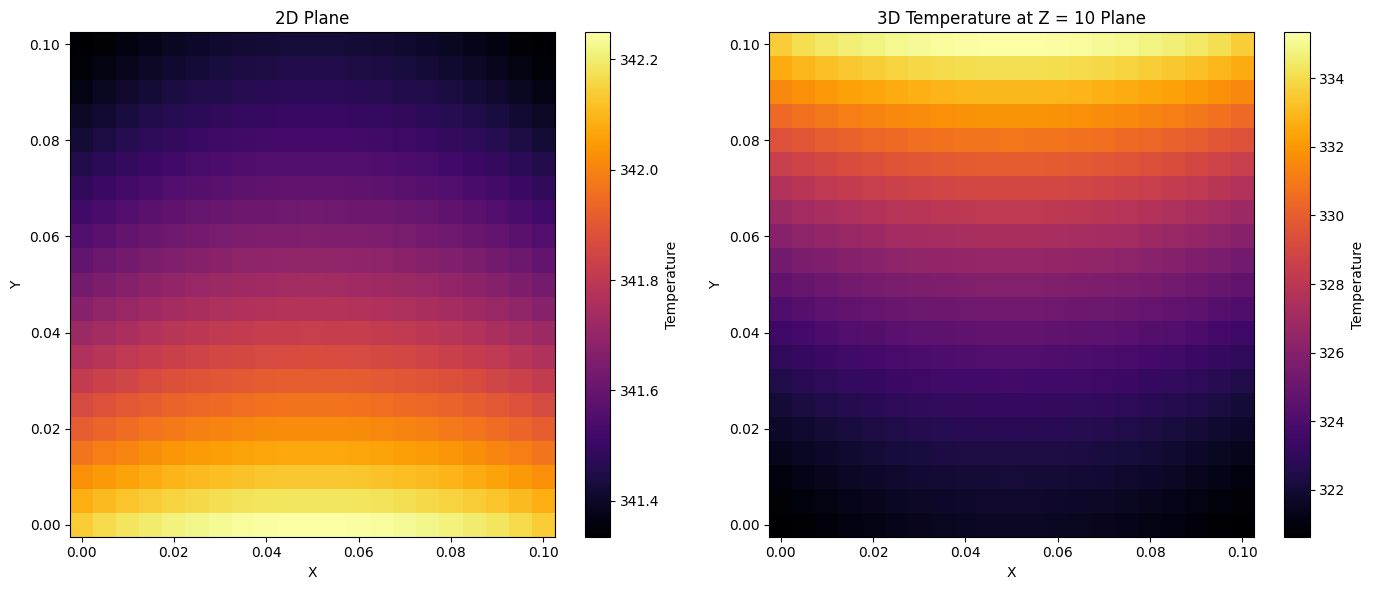

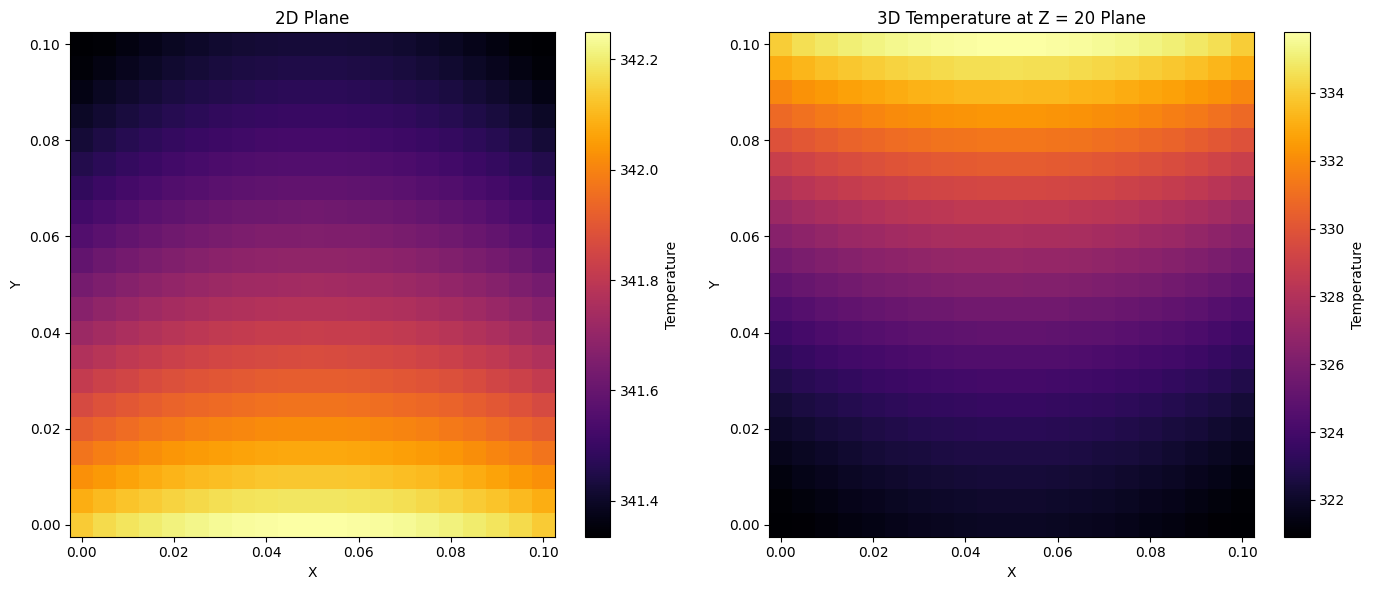

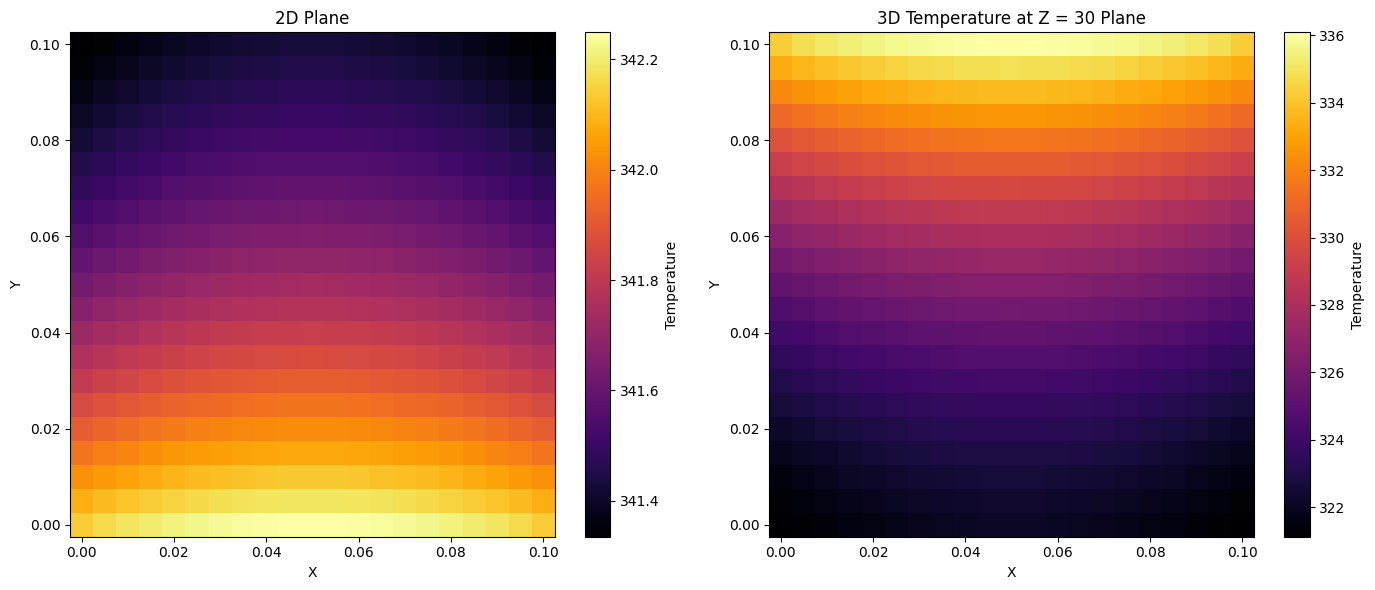

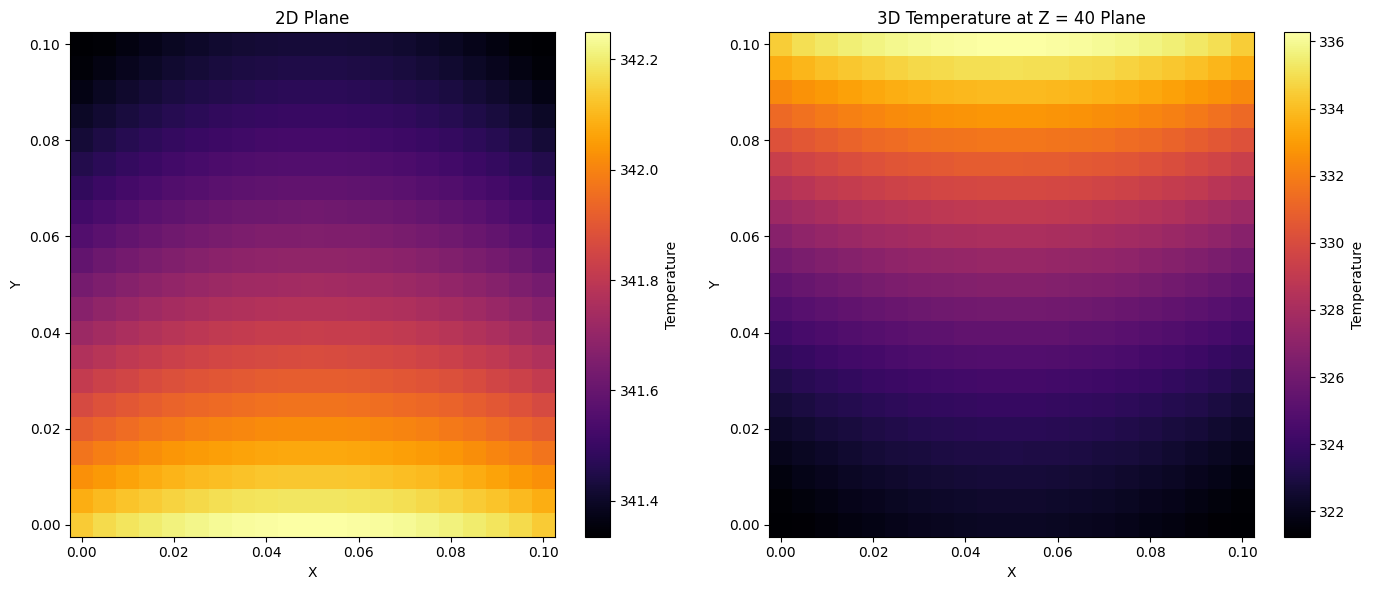

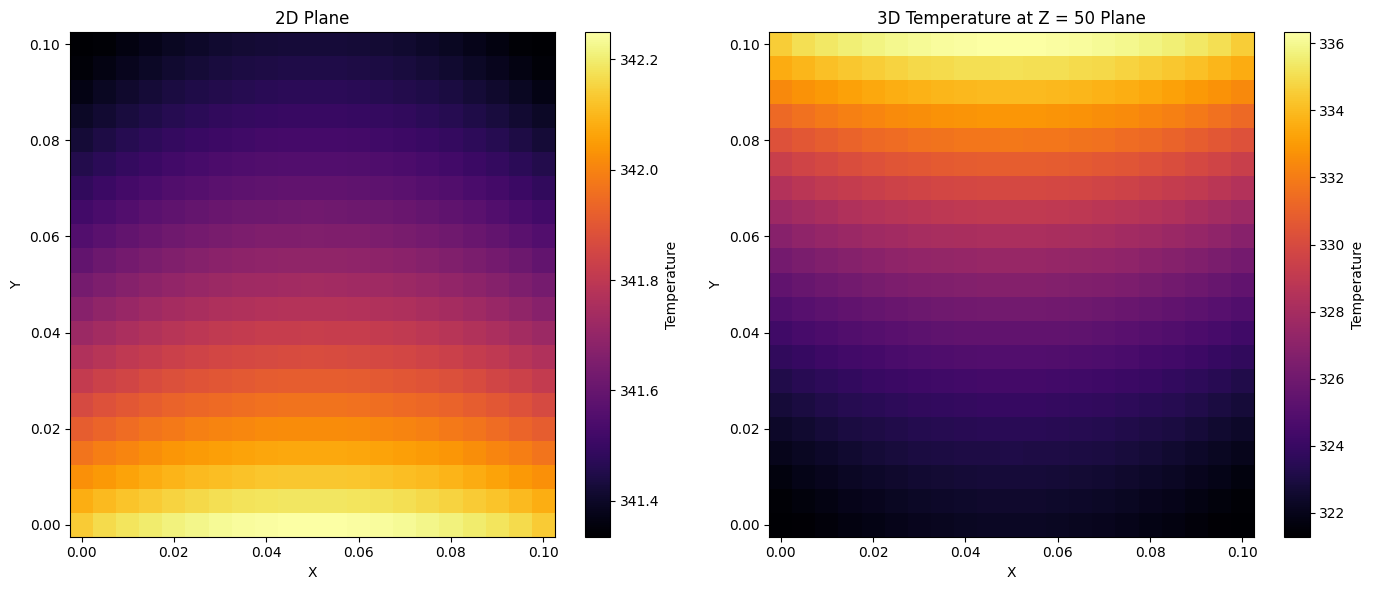

In [21]:
for z in z_planes:
    file_path = os.path.join(base_dir_3d, z, "temp.csv")
    if os.path.exists(file_path):
        df_3d = pd.read_csv(file_path, header = None, skiprows = 1)
        df_3d.columns = ['X', 'Y', 'Temperature']
        X3d, Y3d, Z3d = prepare_grid(df_3d)

        # Plot comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

        c1 = ax1.pcolormesh(X2d, Y2d, Z2d, cmap = 'inferno', shading = 'auto')
        ax1.set_title(f'2D Plane')
        ax1.set_xlabel('X'); ax1.set_ylabel('Y')
        fig.colorbar(c1, ax = ax1, label = 'Temperature')

        c2 = ax2.pcolormesh(X3d, Y3d, Z3d, cmap = 'inferno', shading = 'auto')
        ax2.set_title(f'3D Temperature at Z = {z} Plane')
        ax2.set_xlabel('X'); ax2.set_ylabel('Y')
        fig.colorbar(c2, ax = ax2, label = 'Temperature')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"File not found for Z = {z}")

In [20]:
def save_heatmap_csv(X, Y, Z, save_path):
    df_save = pd.DataFrame({
        'X': X.flatten(),
        'Y': Y.flatten(),
        'Temperature': Z.flatten()
    })
    
    df_save.to_csv(save_path, index = False)

# Save 2D temperature heatmap
save_path_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d\2D_Temperature_Heatmap.csv"
save_heatmap_csv(X2d, Y2d, Z2d, save_path_2d)

# Save 3D temperature heatmap at Z = 10
z_level = 40
save_path_3d = fr"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d\{z_level}\3D_Temperature_Heatmap.csv"
save_heatmap_csv(X3d, Y3d, Z3d, save_path_3d)